<a href="https://colab.research.google.com/github/likeshd/predictive_analysis/blob/main/xgboost_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/export_public_KPIMain_2024_07_09_15_16_48_950.csv')
# data.head(5)

In [3]:
# Select the necessary columns
data1 = data[["month", "year", "address_id", "kpi_em_Total_Emission"]]

# Create the 'actual_date' column by directly using the year and month columns
data1['actual_date'] = pd.to_datetime(data1.assign(day=1)[['year', 'month', 'day']])

# Sort the DataFrame by 'actual_date' in ascending order
data1.sort_values(by='actual_date', inplace=True)
data1.head(10)

<ipython-input-3-3d67cb4b4d4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['actual_date'] = pd.to_datetime(data1.assign(day=1)[['year', 'month', 'day']])
<ipython-input-3-3d67cb4b4d4c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.sort_values(by='actual_date', inplace=True)


,month,year,address_id,kpi_em_Total_Emission,actual_date
21,1,2021,'565a43d6-d52c-4dfa-9776-856135a27883',0.000000,2021-01-01
27,1,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.000000,2021-01-01
23,2,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.000000,2021-02-01
22,2,2021,'565a43d6-d52c-4dfa-9776-856135a27883',0.000000,2021-02-01
36,3,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.000000,2021-03-01
4,3,2021,'565a43d6-d52c-4dfa-9776-856135a27883',0.000000,2021-03-01
56,4,2021,'565a43d6-d52c-4dfa-9776-856135a27883',57.783468,2021-04-01
29,4,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.000000,2021-04-01
70,4,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',814.171210,2021-04-01
57,5,2021,'565a43d6-d52c-4dfa-9776-856135a27883',60.516650,2021-05-01


In [4]:
locations = data1["address_id"].unique()
locations

array(["'565a43d6-d52c-4dfa-9776-856135a27883'",
       "'bf43afb1-2b9b-401c-989d-7f044074e3ba'",
       "'7c74d921-66ac-41a8-90a6-4ebc05340b87'"], dtype=object)

In [5]:
filtered_df2 = data1[data1['address_id'] == "'7c74d921-66ac-41a8-90a6-4ebc05340b87'"]
# Drop existing index
filtered_df2.reset_index(drop=True, inplace=True)

# Set 'date' column as new index
filtered_df2.set_index('actual_date', inplace=True)

filtered_df2

,month,year,address_id,kpi_em_Total_Emission
actual_date,,,,
2021-04-01,4,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',814.171210
2021-05-01,5,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',1394.955026
2021-06-01,6,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',1775.876803
2021-07-01,7,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',919.602242
2021-08-01,8,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',1017.354996
2021-09-01,9,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',1848.059469
2021-10-01,10,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',1014.146248
2021-11-01,11,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',7427.967614
2021-12-01,12,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',257.036164


In [6]:
print(filtered_df2.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2021-04-01 to 2024-06-01
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  39 non-null     int64  
 1   year                   39 non-null     int64  
 2   address_id             39 non-null     object 
 3   kpi_em_Total_Emission  39 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ KB
None


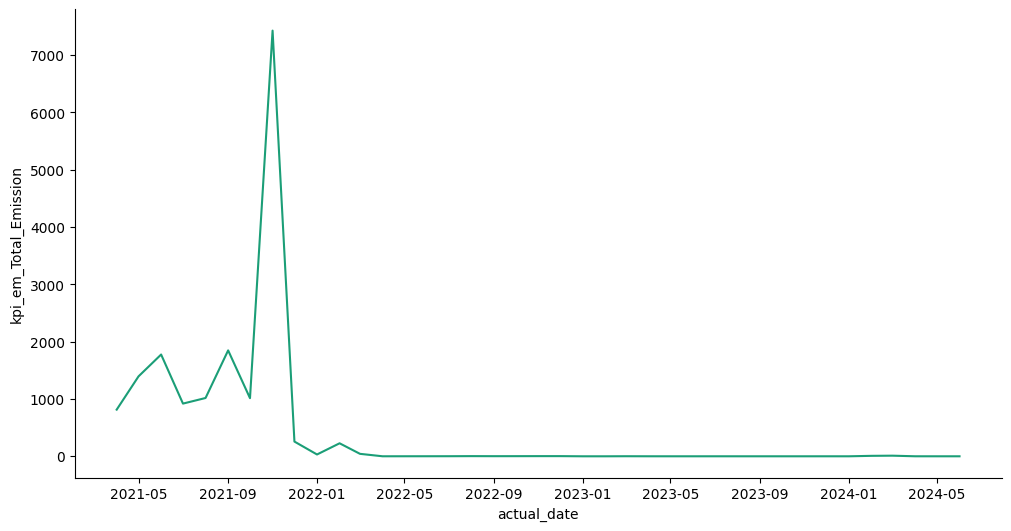

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series.index
  ys = series['kpi_em_Total_Emission']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_df2.sort_values('actual_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('actual_date')
_ = plt.ylabel('kpi_em_Total_Emission')

# XGBoost

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt

In [9]:
filtered_df2 = filtered_df2.drop(columns=['month', 'year', 'address_id'])

In [10]:
# Function to create lag features
def create_lag_features(df, lag=1):
    df_lag = df.copy()
    for i in range(1, lag + 1):
        df_lag[f'lag_{i}'] = df_lag['kpi_em_Total_Emission'].shift(i)
    return df_lag.dropna()

In [11]:
# Create lag features
lag = 12  # Number of lag features (for monthly data, this represents a year)
df_lag = create_lag_features(filtered_df2, lag)
df_lag.head(10)

,kpi_em_Total_Emission,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
actual_date,,,,,,,,,,,,,
2022-04-01,0.321179,42.897109,226.969613,31.676003,257.036164,7427.967614,1014.146248,1848.059469,1017.354996,919.602242,1775.876803,1394.955026,814.171210
2022-05-01,0.642358,0.321179,42.897109,226.969613,31.676003,257.036164,7427.967614,1014.146248,1848.059469,1017.354996,919.602242,1775.876803,1394.955026
2022-06-01,0.969408,0.642358,0.321179,42.897109,226.969613,31.676003,257.036164,7427.967614,1014.146248,1848.059469,1017.354996,919.602242,1775.876803
2022-07-01,1.432622,0.969408,0.642358,0.321179,42.897109,226.969613,31.676003,257.036164,7427.967614,1014.146248,1848.059469,1017.354996,919.602242
2022-08-01,2.944141,1.432622,0.969408,0.642358,0.321179,42.897109,226.969613,31.676003,257.036164,7427.967614,1014.146248,1848.059469,1017.354996
2022-09-01,1.927074,2.944141,1.432622,0.969408,0.642358,0.321179,42.897109,226.969613,31.676003,257.036164,7427.967614,1014.146248,1848.059469
2022-10-01,2.261952,1.927074,2.944141,1.432622,0.969408,0.642358,0.321179,42.897109,226.969613,31.676003,257.036164,7427.967614,1014.146248
2022-11-01,2.865245,2.261952,1.927074,2.944141,1.432622,0.969408,0.642358,0.321179,42.897109,226.969613,31.676003,257.036164,7427.967614
2022-12-01,2.890611,2.865245,2.261952,1.927074,2.944141,1.432622,0.969408,0.642358,0.321179,42.897109,226.969613,31.676003,257.036164


In [12]:
# Split data into train and test
train_size = int(len(df_lag) * 0.8)
train, test = df_lag.iloc[:train_size], df_lag.iloc[train_size:]

# Prepare features and target
X_train, y_train = train.drop(columns=['kpi_em_Total_Emission']), train['kpi_em_Total_Emission']
X_test, y_test = test.drop(columns=['kpi_em_Total_Emission']), test['kpi_em_Total_Emission']

In [13]:
# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [14]:
# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

In [15]:
# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [16]:
# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [17]:
# Train the model with the best parameters
best_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror')
best_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
# Make predictions
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

In [19]:
# Evaluate model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

mse_train, rmse_train, mae_train = evaluate_model(y_train, train_pred)
mse_test, rmse_test, mae_test = evaluate_model(y_test, test_pred)

print(f"Train MSE: {mse_train}, Train RMSE: {rmse_train}, Train MAE: {mae_train}")
print(f"Test MSE: {mse_test}, Test RMSE: {rmse_test}, Test MAE: {mae_test}")

Train MSE: 0.23126220704428965, Train RMSE: 0.4808972936545699, Train MAE: 0.3946333276098815
Test MSE: 27.46897518230013, Test RMSE: 5.241085305764459, Test MAE: 3.310229141490682


In [20]:
# Forecast future emissions for the next 6 months (assuming monthly data)
num_predictions = 6
future_dates = pd.date_range(start=filtered_df2.index[-1], periods=num_predictions + 1, freq='M')[1:]

last_window = df_lag.drop(columns=['kpi_em_Total_Emission']).iloc[-1].values.reshape(1, -1)
print(last_window)

future_predictions = []
for _ in range(num_predictions):
    next_pred = best_model.predict(last_window)
    future_predictions.append(next_pred[0])
    last_window = np.append(last_window[:, 1:], next_pred).reshape(1, -1)

print(f"Future predictions for the next 6 months: {future_predictions}")
print(f"future_dates = {future_dates}")

[[1.23930620e-01 3.49589800e-01 1.07387573e+01 7.97092824e+00
  4.49912000e-02 1.80630240e-01 2.77382000e-02 6.60240000e-03
  1.04811000e-01 1.14057000e-01 2.87943000e-01 5.27599800e-02]]
Future predictions for the next 6 months: [0.8649392, 0.85802174, 0.4206753, 0.4206753, 0.4206753, 0.4206753]
future_dates = DatetimeIndex(['2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='M')


# Random Forest

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [22]:
# Function to create lag features
def create_lag_features(df, lag=1):
    df_lag = df.copy()
    for i in range(1, lag + 1):
        df_lag[f'lag_{i}'] = df_lag['kpi_em_Total_Emission'].shift(i)
    return df_lag.dropna()

# Create lag features
lag = 12  # Number of lag features (for monthly data, this represents a year)
df_lag = create_lag_features(filtered_df2, lag)

In [23]:
# Split data into train and test
train_size = int(len(df_lag) * 0.8)
train, test = df_lag.iloc[:train_size], df_lag.iloc[train_size:]

# Prepare features and target
X_train, y_train = train.drop(columns=['kpi_em_Total_Emission']), train['kpi_em_Total_Emission']
X_test, y_test = test.drop(columns=['kpi_em_Total_Emission']), test['kpi_em_Total_Emission']

In [24]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf_model = RandomForestRegressor()


In [25]:
# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print(f"Best parameters from grid search: {best_params}")

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters from grid search: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [26]:
# Train the model with the best parameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4)

In [27]:
# Make predictions
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

In [28]:
# Evaluate model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

mse_train, rmse_train, mae_train = evaluate_model(y_train, train_pred)
mse_test, rmse_test, mae_test = evaluate_model(y_test, test_pred)

print(f"Train MSE: {mse_train}, Train RMSE: {rmse_train}, Train MAE: {mae_train}")
print(f"Test MSE: {mse_test}, Test RMSE: {rmse_test}, Test MAE: {mae_test}")

Train MSE: 0.41542782868332845, Train RMSE: 0.6445369102567583, Train MAE: 0.452228883744426
Test MSE: 27.50859024317651, Test RMSE: 5.2448632244489, Test MAE: 3.0879818970924764


In [29]:
# Forecast future emissions for the next 6 months (assuming monthly data)
num_predictions = 6
future_dates = pd.date_range(start=filtered_df2.index[-1], periods=num_predictions + 1, freq='M')[1:]

last_window = df_lag.drop(columns=['kpi_em_Total_Emission']).iloc[-1].values.reshape(1, -1)

future_predictions = []
for _ in range(num_predictions):
    next_pred = best_model.predict(last_window)
    future_predictions.append(next_pred[0])
    last_window = np.append(last_window[:, 1:], next_pred).reshape(1, -1)

print(f"Future predictions for the next 6 months: {future_predictions}")

Future predictions for the next 6 months: [0.2311888332483038, 0.16027082369243087, 0.535879133045785, 0.5541762284164197, 0.15411192395497053, 0.1613599648819547]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does